In [1]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

%matplotlib inline


Using TensorFlow backend.


In [2]:
# Set some parameters
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed


In [4]:
len(os.listdir('../dataset1/images_prepped_train/')), len(os.listdir('../dataset1/images_prepped_test//'))

(367, 101)

In [6]:
# TRAIN_PATH = '../input/stage1_train/'
# TEST_PATH = '../input/stage1_test/'
os.listdir('../dataset1')

['images_prepped_train',
 'annotations_prepped_train',
 'annotations_prepped_test',
 'images_prepped_test']

In [29]:
TRAIN_PATH = '../dataset1/images_prepped_train/'
TEST_PATH = '../dataset1/images_prepped_test/'
TRAIN_ANN = '../dataset1/annotations_prepped_train/'
TEST_ANN =  '../dataset1/annotations_prepped_test/'

In [20]:
len(os.listdir(TRAIN_PATH)), len(os.listdir(TRAIN_ANN))

(367, 367)

In [21]:
a1 = os.listdir(TRAIN_PATH)
a2 = os.listdir(TRAIN_ANN)

for i,j in zip(a1,a2):
    if i != j:
        print(i,j)

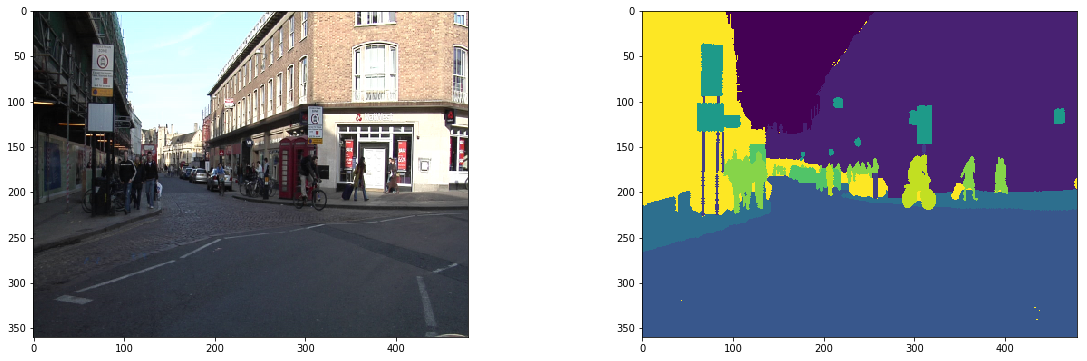

In [32]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].imshow(plt.imread(TRAIN_PATH+os.listdir(TRAIN_PATH)[45]))
ax[1].imshow(plt.imread(TRAIN_ANN+os.listdir(TRAIN_ANN)[45]))


In [ ]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

a1 = os.listdir(TRAIN_PATH)
a2 = os.listdir(TRAIN_ANN)

it = 0
for img_id, img_mask_id in zip(a1,a2):
    X_train[it] = plt.imread
    
    path = TRAIN_PATH + id_
#     print(id_, os.listdir(path + '/images/'))
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

In [ ]:
'../dataset1/images_prepped_train/

In [6]:
# Get train and test IDs
# train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids = next(os.walk(TEST_PATH))[1]
train_ids = save_dirs
test_ids = next(os.walk(TEST_PATH))[1]

len(train_ids), len(test_ids)

(303, 65)

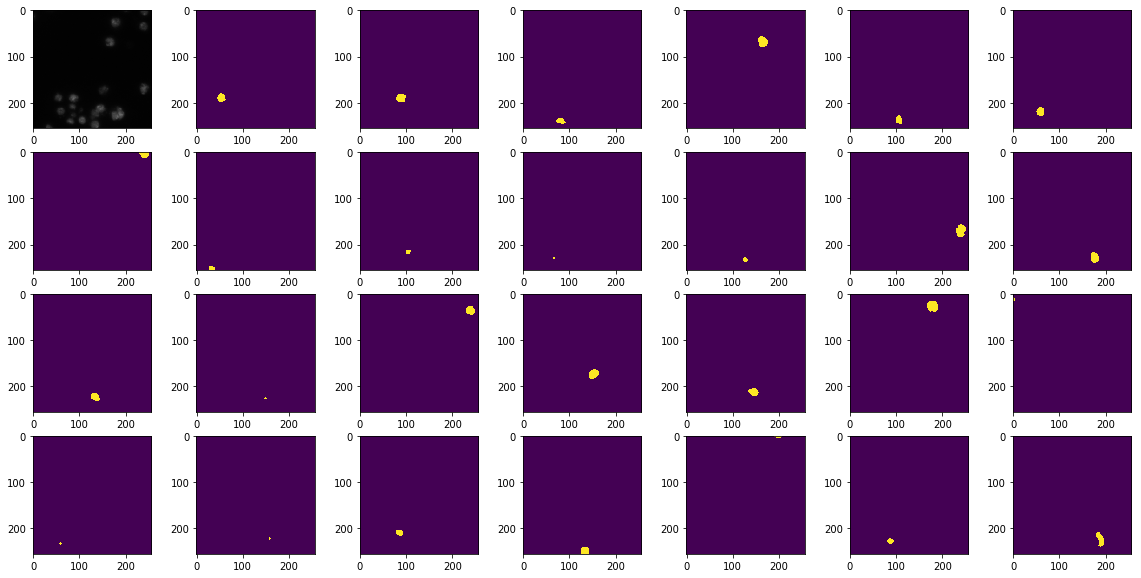

In [7]:
id1 = '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552'
id2s = os.listdir('../blood-cell-data/stage1/stage1_train/'+id1+'/masks')

dt1 = plt.imread('../blood-cell-data/stage1/stage1_train/'+id1+'/images/'+id1+'.png')
# dt2 = plt.imread('../blood-cell-data/stage1/stage1_train/'+id1+'/masks/'+id2+'.png')

fig, ax = plt.subplots(4,7,figsize=(20,10))
axes = ax.flatten()
for i in range(28):
    if i == 0:
        axes[i].imshow(dt1[:,:,:3])
        continue
    temp = plt.imread('../blood-cell-data/stage1/stage1_train/'+id1+'/masks/'+id2s[i-1])
#     print(temp.shape)
    axes[i].imshow(temp.reshape(256,256))

In [26]:
# import progressbar

# for i in progressbar.Progressbar(range(100)):
#     print("hey")

In [8]:
from time import sleep
import sys

for i in range(21):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write("[%-20s] %d%%" % ('='*i, 5*i))
    sys.stdout.flush()
    sleep(0.25)

[====================] 100%

In [9]:
# from tqdm import tqdm_notebook as tqdm
# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
# sys.stdout.flush()
import progressbar

# for n, id_ in progressbar.progressbar(enumerate(train_ids)):

for n, id_ in enumerate(train_ids):
# for n, id_ in enumerate(train_ids):
    if n%10 == 0:
        sys.stdout.write('\r')
    path = TRAIN_PATH + id_
#     print(id_, os.listdir(path + '/images/'))
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask
    
    if n%10 == 0:
        sys.stdout.write("[%-100s] %d%%" % ('='*n, (100/365.0)*n))
        sys.stdout.flush()

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in enumerate(test_ids):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing train images and masks ... 
[============================================================================================================================================================================================================================================================================================================] 82%Getting and resizing test images ... 
Done!


In [10]:
X_train.shape, Y_train.shape, X_test.shape

((303, 128, 128, 3), (303, 128, 128, 1), (65, 128, 128, 3))

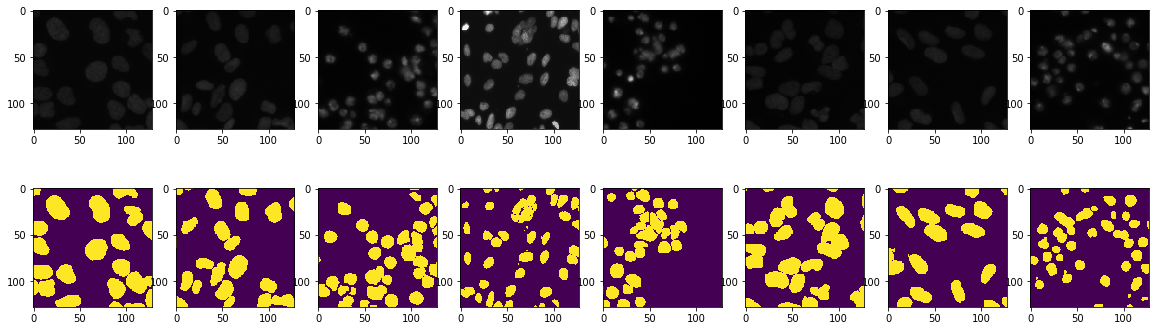

In [50]:
fig, ax = plt.subplots(2,8,figsize=(20,6))
axes = ax.flatten()
for i in range(8):
    idx = np.random.randint(X_train.shape[0])
    axes[i].imshow(X_train[idx])
    axes[i+8].imshow(np.squeeze(Y_train[idx]))

In [11]:
X_train = X_train/255.0

In [12]:
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)


In [13]:
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
def build_model(inputs):
    
    c1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model
    
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])


In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 896         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

{'loss': [0.5184792381505369], 'mean_iou': [0.38138459175333334]}

In [15]:
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler


# early_stop = EarlyStopping(monitor='val_loss', 
#                            min_delta=0.001, 
#                            patience=5, 
#                            mode='min', 
#                            verbose=1)

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
#                               factor=0.2, 
#                               patience=2, 
#                               min_lr=1e-8) 


# LOG_FILE_PATH = 'check-points/unet-baseline.hdf5'#-{epoch:02d}-{mean_iou:.4f}.hdf5'
# checkpoint = ModelCheckpoint(filepath=LOG_FILE_PATH, 
# #                              monitor='val_loss', 
#                              verbose=1, 
#                              save_best_only=True)

LOG_FILE_PATH = 'check-points/unet-baseline.hdf5'#-{epoch:02d}-{mean_iou:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=LOG_FILE_PATH, 
                             verbose=1, 
                             save_best_only=True)

early_stop = EarlyStopping(patience=5,
#                            monitor='val_loss', 
#                            min_delta=0.001, 
#                            mode='min', 
                           verbose=1)

reduce_lr = ReduceLROnPlateau(factor=0.2, 
#                               monitor='val_loss', 
                              patience=2, 
                              min_lr=1e-8)
                              
import tensorflow as tf
from keras.utils import multi_gpu_model
from keras.optimizers import Adam


with tf.device('/cpu:0'):
    model = build_model(inputs)
#     wt_dir1 = '../weights/improved-baseline/attention_more_data_wts_1.6000001e-06_0.068.npy'
#     w_load = np.load(wt_dir1)
#     load= True
#     if load:
#         model.set_weights(w_load)
#     #     model.set_weights(wss)
#         print("loaded weights successfully")
    print("built model successfully")
    
    
optimizer = Adam(lr=0.5e-3, beta_1=0.9, beta_2=0.999)

parallel_model = multi_gpu_model(model, gpus=3)
parallel_model.compile(loss = 'binary_crossentropy',
                       optimizer=optimizer,
                       metrics=[mean_iou])
#               metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])




built model successfully


In [16]:
LOG_FILE_PATH = 'check-points/unet-baseline.hdf5'#-{epoch:02d}-{mean_iou:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=LOG_FILE_PATH, 
                             verbose=1, 
                             save_best_only=True)

early_stop = EarlyStopping(patience=5,
#                            monitor='val_loss', 
#                            min_delta=0.001, 
#                            mode='min', 
                           verbose=1)

reduce_lr = ReduceLROnPlateau(factor=0.2, 
#                               monitor='val_loss', 
                              patience=2, 
                              min_lr=1e-8) 

In [16]:
call_backs = [early_stop, reduce_lr, checkpoint]

EPOCHS = 100
print("let's start parallel model for 100 epochs")
parallel_model.fit( x                = X_train, 
                    y                = Y_train, 
                    batch_size       = 100, 
                    epochs           = EPOCHS, 
                    verbose          = 1, 
                    callbacks        = call_backs, 
                    validation_split = 0.2, 
                    shuffle          = True, 
                    initial_epoch    = 0)

let's start parallel model for 10 epochs
Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 9s 39ms/step - loss: 0.6401 - mean_iou: 0.2372 - val_loss: 0.4668 - val_mean_iou: 0.4154

Epoch 00001: val_loss improved from inf to 0.46676, saving model to check-points/unet-baseline.hdf5
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4632 - mean_iou: 0.4202 - val_loss: 0.7800 - val_mean_iou: 0.4219

Epoch 00002: val_loss did not improve from 0.46676
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5531 - mean_iou: 0.4273 - val_loss: 0.3701 - val_mean_iou: 0.4295

Epoch 00003: val_loss improved from 0.46676 to 0.37014, saving model to check-points/unet-baseline.hdf5
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3860 - mean_iou: 0.4302 - val_loss: 0.3415 - val_mean_iou: 0.4303

Epoch 00004: val_loss improved from 0.37014 to 0.34152, saving model to check-poin

In [ ]:
# EPOCHS = 10
# print("let's start parallel model for 10 epochs")
# parallel_model.fit(        = train_batch, 
#                      steps_per_epoch  = len(train_batch), 
#                      epochs           = epochs, 
#                      verbose          = 1,
#                      validation_data  = valid_batch,
#                      validation_steps = len(valid_batch),
#                      callbacks        = [reduce_lr, early_stop],
#                      use_multiprocessing=True,
#                      workers=4)


In [85]:
# Fit model
# earlystopper = EarlyStopping(patience=5, verbose=1)
# checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
#                     callbacks=[earlystopper, checkpointer])

In [17]:
# Predict on train, val and test
model = load_model('check-points/unet-baseline.hdf5', 
                   custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))


65/65 [==============================] - 0s 3ms/step


In [20]:
preds_train_t.shape

(303, 128, 128, 1)

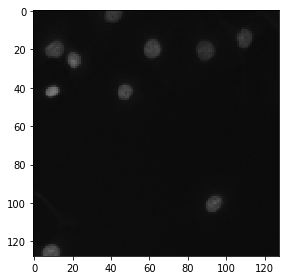

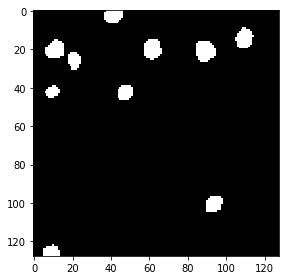

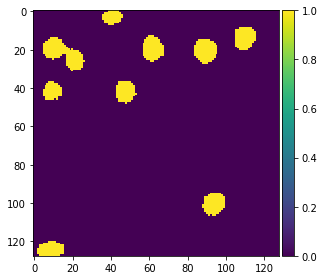

In [18]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

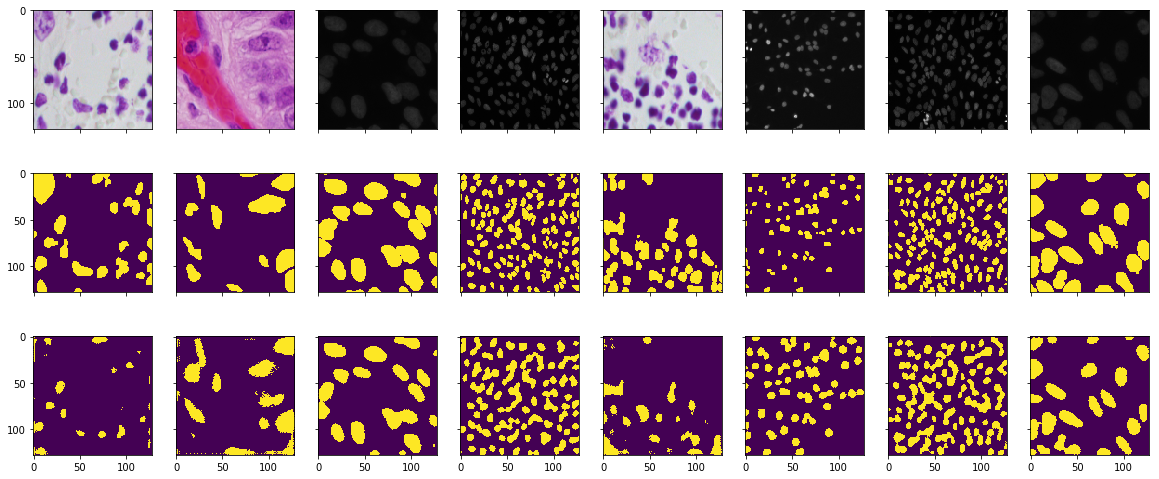

In [29]:
fig, ax = plt.subplots(3,8,figsize=(20,9), sharex=True, sharey=True)
axes = ax.flatten()
for i in range(8):
    idx = np.random.randint(X_train.shape[0])
    axes[i].imshow(X_train[idx])
    axes[i+8].imshow(np.squeeze(Y_train[idx]))
    axes[i+16].imshow(np.squeeze(preds_train_t[idx]))
    
fig.subplots_adjust(hspace=0)

In [ ]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)



In [ ]:
new_test_ids = []
rles = []
for n, id_ in enumerate(test_ids):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))
